<a href="https://colab.research.google.com/github/maleehasiddiqui20/TermDepositMarketing/blob/master/Term_Deposit_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Uploading Data:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92


In [0]:
#From github
import pandas as pd
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
df = pd.read_csv(url)

2) Initial Exploration

In [0]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


**Attribute Information:**

Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [0]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [0]:
print(df.shape)

(41188, 21)


In [0]:
print(df.isnull().values.any())
print()
print(df.isnull().sum())

False

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [0]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [0]:
#see levels for each variable
df['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [0]:
#Info for all columns
columnNo = 0
types = df.dtypes
for (columnName, columnData) in df.iteritems():
  print('Colunm Name : ', columnName)
  print('Column Type : ', types[columnNo])
  columnNo = columnNo + 1
  columnValues = df[columnName].unique()
  print('Column Values : ' , columnValues)
  print('\n')
  

Colunm Name :  age
Column Type :  int64
Column Values :  [44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]


Colunm Name :  job
Column Type :  object
Column Values :  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']


Colunm Name :  marital
Column Type :  object
Column Values :  ['married' 'single' 'divorced' 'unknown']


Colunm Name :  education
Column Type :  object
Column Values :  ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


Colunm Name :  default
Column Type :  object
Column Values :  ['unknown' 'no' 'yes']


Colunm Name :  housing
Column Type :  object
Column Values :  ['yes' 'no' 'unknown']


Colunm Name :  loan
Column Type

3) Preprocessing

In [0]:
#reducing categories for 'Education'
#It has : education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
import numpy as np

df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

4) Data Exploratation

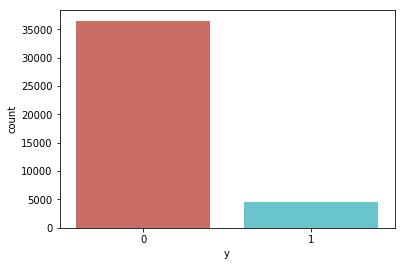

In [0]:
#Visualize y variable
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x='y',data = df, palette='hls')
plt.show()

In [0]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [0]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


**Observations**
1.   Class Imbalance as % of no subscription is more than 88%
2.   'pdays' - no of days passed for which the customer is last contacted is lower on average for which customers opt for campaign
3.    'duration' of campaign is more for customers that opt for campaign
4. 'euribor3m' is greater for customers that opted.
5. Average age of customers who bought the term deposit is slightly higher.





In [0]:
df.groupby('day_of_week').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
day_of_week,,,,,,,,,,,
fri,40.177846,252.748818,2.719944,967.793791,0.177463,0.032337,93.578735,-40.532260,3.566249,5165.109799,0.108087
mon,40.412497,246.568358,2.645760,962.852948,0.171012,0.026063,93.577108,-40.877790,3.542196,5164.568393,0.099483
thu,39.591557,265.674591,2.595268,959.501913,0.174417,0.058460,93.556380,-40.753323,3.574923,5166.662693,0.121188
tue,40.427441,260.455995,2.426823,959.715575,0.173053,0.128220,93.577088,-40.034227,3.701038,5168.486094,0.117800
wed,39.526801,265.883206,2.449840,962.859970,0.169044,0.166745,93.590225,-40.281387,3.726885,5170.425436,0.116671


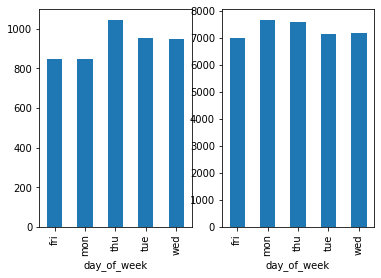

In [0]:
#how many people take subs on which day
import matplotlib.pyplot as plt 
plt.subplot(1, 2, 1)
on = df[df.y == 1]
df_week = on.groupby(['day_of_week'])['y'].count()
df_week.plot.bar()

plt.subplot(1, 2, 2)
off = df[df.y == 0]
df_week = off.groupby(['day_of_week'])['y'].count()
df_week.plot.bar()

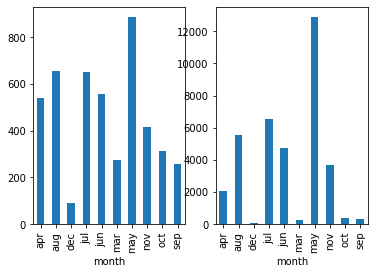

In [0]:
#what is the trend by month
import matplotlib.pyplot as plt 
#month
plt.subplot(1, 2, 1)
on = df[df.y == 1]
df_week = on.groupby(['month'])['y'].count()
df_week.plot.bar()

plt.subplot(1, 2, 2)
off = df[df.y == 0]
df_week = off.groupby(['month'])['y'].count()
df_week.plot.bar()

In [0]:
df.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
month,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


-seeing avg per month, euribor rates are more

EVALUATING PREDICTORS FOR OUTCOME VARIABLE

Text(0, 0.5, 'Frequency of Purchase')

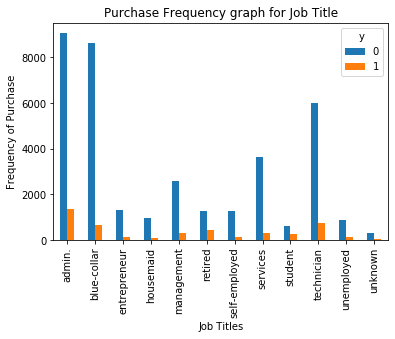

In [0]:
import matplotlib.pyplot as plt
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency graph for Job Title')
plt.xlabel('Job Titles')
plt.ylabel('Frequency of Purchase')

#The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

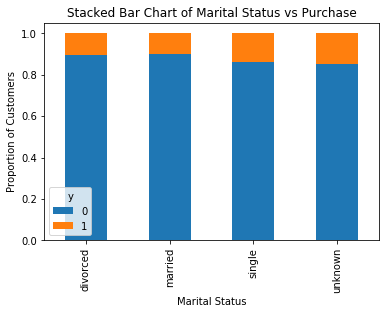

In [0]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')
#not a good predictor

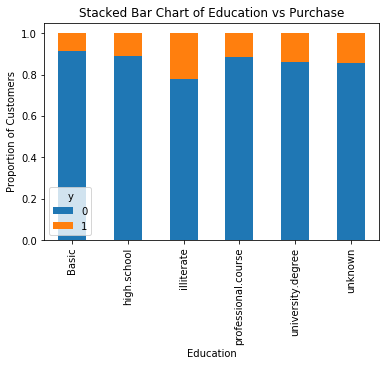

In [0]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

#seems good

Text(0, 0.5, 'Frequency of Purchase')

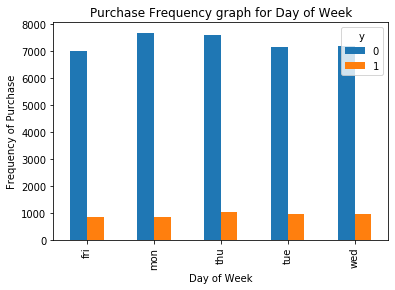

In [0]:
import matplotlib.pyplot as plt
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency graph for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

#not good

Text(0, 0.5, 'Frequency of Purchase')

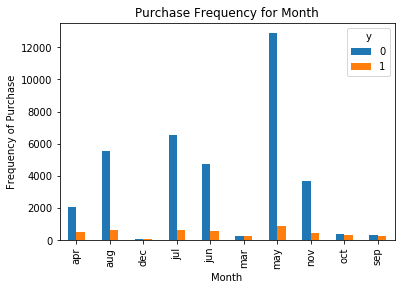

In [0]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

#seems good

Text(0, 0.5, 'Frequency of Purchase')

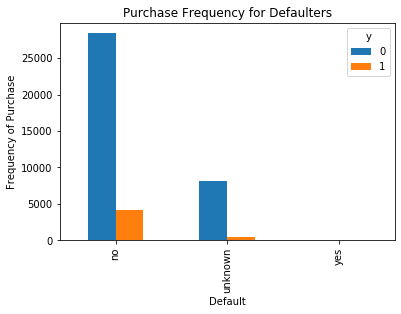

In [0]:
pd.crosstab(df.default,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Defaulters')
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')

#cant say as there are no yes cases

Text(0, 0.5, 'Frequency of Purchase')

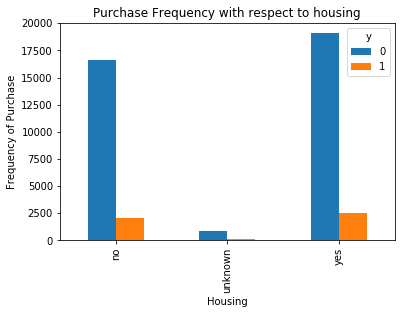

In [0]:
pd.crosstab(df.housing,df.y).plot(kind='bar')
plt.title('Purchase Frequency with respect to housing')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')

#not good

Text(0, 0.5, 'Frequency of Purchase')

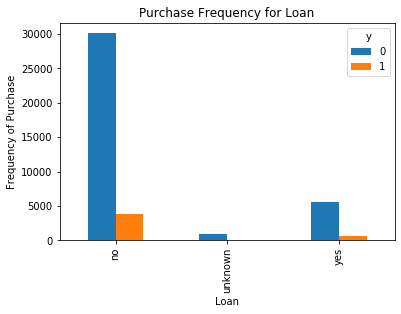

In [0]:
pd.crosstab(df.loan,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Loan')
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')

#seems good

Text(0, 0.5, 'Frequency of Purchase')

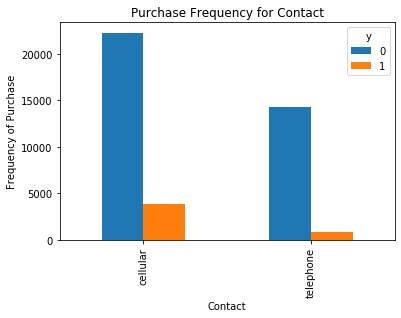

In [0]:
pd.crosstab(df.contact,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact')
plt.xlabel('Contact')
plt.ylabel('Frequency of Purchase')

#seems good

Text(0, 0.5, 'Frequency of Purchase')

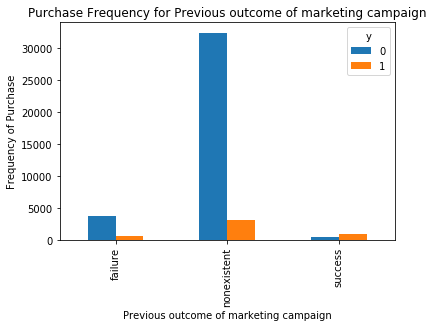

In [0]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Previous outcome of marketing campaign')
plt.xlabel('Previous outcome of marketing campaign')
plt.ylabel('Frequency of Purchase')
#seems good

Text(0, 0.5, 'Frequency')

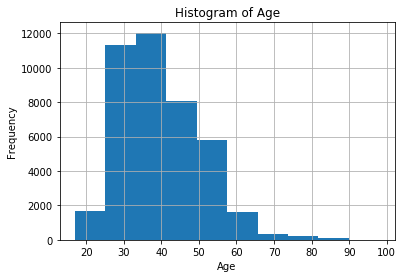

In [0]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#most customers are in range of 30-40

CREATE DUMMY VARIABLES

In [0]:
data = df
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [0]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Over-sampling using SMOTE

In [0]:
from sklearn.model_selection import train_test_split

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Recursive Feature Elimination

In [0]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False False False False False  True False False  True
 False  True False False False False False False False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True False False False False False False  True False
  True]
[39 35 21 40  9 12 17 32  1 30  8  1  7  1  5 29  2  4 24  3  6 10 15 16
 14  1 19 28  1 34 20 38  1  1 42 22 36 33 27 37 31  1  1  1  1  1  1  1
  1  1  1  1 26 25 11 23 41 18  1 13  1]


In [0]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2019-11-12 16:46     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2019-11-12 16:46  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

Logistic Regression Model Fitting

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2505 5170]]
